<a href="https://colab.research.google.com/github/karank420/COE817_Lab_4/blob/main/Gurkaran_Karwal_Lab__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab #3

First and Last Name: Gurkaran Karwal

Student ID: 500831607

Video URL: No Video Necessary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
data_points = np.array([[2.0, 10.0], [2.0, 5.0], [8.0, 4.0], [5.0, 8.0], [7.0, 5.0], [6.0, 4.0], [1.0, 2.0], [4.0, 9.0]])


# Define the initial seeds (centers)
seeds = np.array([[2.0, 5.0], [8.0, 4.0], [4.0, 9.0]])
centroids = np.array([[2.0, 5.0], [8.0, 4.0], [4.0, 9.0]])

# Calculate the distances between each point and each centroid
distances = np.sqrt(((data_points - centroids[:, np.newaxis])**2).sum(axis=2))

# Assign each point to the nearest centroid
clusters = np.argmin(distances, axis=0)

# Print the new clusters
print(clusters)


# Update the centroids
for i in range(len(centroids)):
    centroids[i] = np.mean(data_points[clusters == i], axis=0)

# Print the new centroids
print(centroids)


def k_means(points, epochs):
    # Initialize centroids
    centroids = np.array([[2.0, 5.0], [8.0, 4.0], [4.0, 9.0]])

    for epoch in range(epochs):
        # Assign each point to the nearest centroid
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)

        # Update centroids
        for i in range(len(centroids)):
            centroids[i] = np.mean(points[clusters == i], axis=0)

    return clusters, centroids



def plot_clusters(data_points, clusters, centers):
    # Set the colors for each cluster
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    # Get the number of clusters
    num_clusters = len(np.unique(clusters))

    # Plot the data points
    plt.scatter(data_points[:, 0], data_points[:, 1], c=[colors[i] for i in clusters])

    # Plot the centers
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='k')

    # Plot a circle around each cluster
    for i in range(num_clusters):
        cluster_points = data_points[clusters == i]
        cluster_center = centers[i]
        radius = np.max(np.sqrt(np.sum((cluster_points - cluster_center)**2, axis=1)))
        circle = plt.Circle(cluster_center, radius, color=colors[i], fill=False)
        plt.gca().add_artist(circle)

    plt.grid(True)
    plt.figure(figsize=(12, 10))
    plt.show()





[2 0 1 2 1 1 0 2]
[[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]


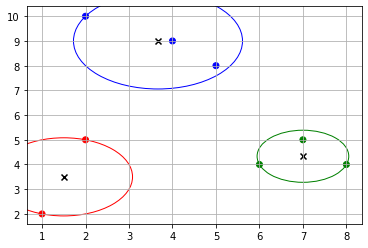

<Figure size 864x720 with 0 Axes>

In [ ]:
new_clust, new_cent = k_means(data_points,1)
plot_clusters(data_points, new_clust, new_cent)

In [ ]:
import numpy as np
import pandas as pd

# Read the dataset from the URL
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df = pd.read_csv(url)

# Select sbp and tobacco features
X = df[['sbp', 'tobacco']].values[:300]

# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Define the euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Define the KMeans class
class KMeans:
    def __init__(self, K=2, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # Initialize empty lists to hold cluster labels and centroids
        self.labels = []
        self.centroids = []

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.K, replace=False)]

        for i in range(self.max_iters):
            # Assign each data point to the nearest centroid
            distances = np.zeros((X.shape[0], self.K))
            for j in range(self.K):
                distances[:,j] = np.apply_along_axis(lambda x: euclidean_distance(x, self.centroids[j]), 1, X)
            self.labels = np.argmin(distances, axis=1)

            # Update centroids to the mean of the assigned data points
            for j in range(self.K):
                self.centroids[j] = np.mean(X[self.labels == j], axis=0)

            # Plot the clusters at each iteration if plot_steps is True
            if self.plot_steps:
                plt.scatter(X[:,0], X[:,1], c=self.labels, cmap='viridis')
                plt.scatter(self.centroids[:,0], self.centroids[:,1], marker='x', s=200, linewidths=3, color='r')
                plt.show()

        return self.labels, self.centroids

# Create an instance of the KMeans class and fit the training data
kmeans = KMeans(K=2)
labels, centroids = kmeans.fit(X)

# Test the model on the remaining data
X_test = df[['sbp', 'tobacco']].values[300:]
X_test = (X_test - np.mean(X, axis=0)) / np.std(X, axis=0)
distances = np.zeros((X_test.shape[0], kmeans.K))
for j in range(kmeans.K):
    distances[:,j] = np.apply_along_axis(lambda x: euclidean_distance(x, centroids[j]), 1, X_test)
y_pred = np.argmin(distances, axis=1)

# Calculate the accuracy of the model
y_true = df['chd'].values[300:]
accuracy = np.sum(y_true == y_pred) / y_true.shape[0]
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.69


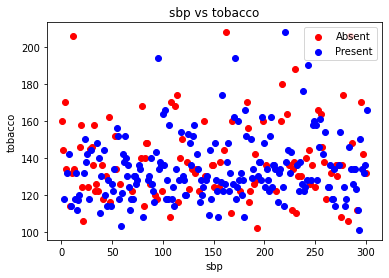

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Extract sbp, tobacco, and chd columns
X = df.iloc[:300, [0, 1]].values
y = pd.factorize(df.iloc[:300, -1])[0]

# Plot sbp vs tobacco with different colors for the two classes
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Absent')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Present')
plt.title('sbp vs tobacco')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()
plt.show()


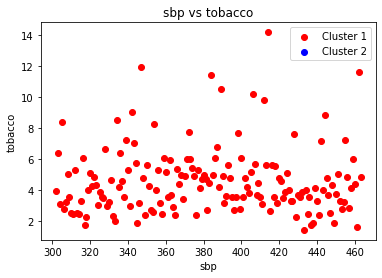

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Extract sbp and tobacco columns for training data
X_train = df.iloc[:300, [0, 3]].values

# Define the number of clusters and maximum iterations
k = 2
max_iterations = 100

# Randomly initialize the cluster centroids
centroids = X_train[np.random.choice(X_train.shape[0], size=k, replace=False), :]

# Perform K-Means clustering using the training data
for i in range(max_iterations):
    # Assign each data point to the nearest centroid
    distances = np.sqrt(((X_train - centroids[:, np.newaxis])**2).sum(axis=2))
    cluster_labels = np.argmin(distances, axis=0)

    # Update the centroids as the mean of the data points in each cluster
    for j in range(k):
        centroids[j] = np.mean(X_train[cluster_labels == j], axis=0)

# Extract sbp and tobacco columns for test data
X_test = df.iloc[300:, [0, 3]].values

# Predict the cluster labels for the test data
distances = np.sqrt(((X_test - centroids[:, np.newaxis])**2).sum(axis=2))
y_pred = np.argmin(distances, axis=0)

# Convert the categorical labels to numeric values
y_test = pd.factorize(df.iloc[300:, -1])[0]

# Plot sbp vs tobacco with different colors for the two predicted clusters
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], color='red', label='Cluster 1')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], color='blue', label='Cluster 2')
plt.title('sbp vs tobacco')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()
plt.show()


Part B:

In [ ]:
import numpy as np

# Define the data points
data = np.array([[2.0, 10.0], [2.0, 5.0], [8.0, 4.0], [5.0, 8.0], [7.0, 5.0], [6.0, 4.0], [1.0, 2.0], [4.0, 9.0]])

# Calculate the Euclidean distance matrix
distances = np.sqrt(((data[:, np.newaxis, :] - data) ** 2).sum(axis=2))

# Sort the distance matrix and get the indices of the sorted elements
sorted_indices = np.argsort(distances, axis=None)

# Initialize the cluster assignments
cluster_assignments = np.zeros(len(data), dtype=int)

# Assign the first data point to a new cluster
cluster_assignments[0] = 1

# Assign the rest of the data points to clusters
for i in sorted_indices:
    if i // len(data) != i % len(data) and distances.flat[i] <= 4:
        if cluster_assignments[i // len(data)] == 0:
            cluster_assignments[i // len(data)] = cluster_assignments[i % len(data)]
        elif cluster_assignments[i // len(data)] != cluster_assignments[i % len(data)]:
            old_cluster = cluster_assignments[i % len(data)]
            new_cluster = cluster_assignments[i // len(data)]
            cluster_assignments[cluster_assignments == old_cluster] = new_cluster

# Print the cluster assignments
print("Cluster assignments:", cluster_assignments)


Cluster assignments: [1 1 1 1 1 1 1 1]


Part C

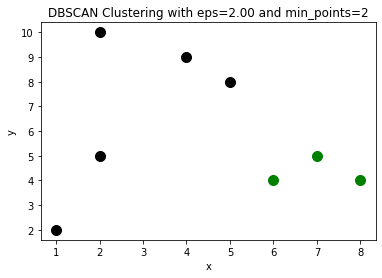

In [ ]:
import math
import matplotlib.pyplot as plt

def eps_neighborhood(p, q, eps):
    return math.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2) <= eps

def region_query(dataset, point_index, eps):
    neighbors = []
    for i in range(len(dataset)):
        if i != point_index and eps_neighborhood(dataset[point_index], dataset[i], eps):
            neighbors.append(i)
    return neighbors

def dbscan(dataset, eps, min_points):
    cluster_label = 0
    visited = set()
    clusters = [0] * len(dataset)
    for i in range(len(dataset)):
        if i not in visited:
            visited.add(i)
            neighbors = region_query(dataset, i, eps)
            if len(neighbors) < min_points:
                clusters[i] = -1
            else:
                cluster_label += 1
                clusters[i] = cluster_label
                expand_cluster(dataset, clusters, visited, neighbors, cluster_label, eps, min_points)
    return clusters

def expand_cluster(dataset, clusters, visited, neighbors, cluster_label, eps, min_points):
    i = 0
    while i < len(neighbors):
        j = neighbors[i]
        if j not in visited:
            visited.add(j)
            new_neighbors = region_query(dataset, j, eps)
            if len(new_neighbors) >= min_points:
                neighbors += new_neighbors
        if clusters[j] == 0:
            clusters[j] = cluster_label
        i += 1

# dataset
dataset = [(2,10), (2,5), (8,4), (5,8), (7,5), (6,4), (1,2), (4,9)]

# DBSCAN parameters
eps = 2
min_points = 2

# clustering
clusters = dbscan(dataset, eps, min_points)

# plot clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, point in enumerate(dataset):
    color = 'k' if clusters[i] == -1 else colors[clusters[i] % len(colors)]
    plt.scatter(point[0], point[1], color=color, s=100)
plt.title('DBSCAN Clustering with eps={:.2f} and min_points={}'.format(eps, min_points))
plt.xlabel('x')
plt.ylabel('y')
plt.show()


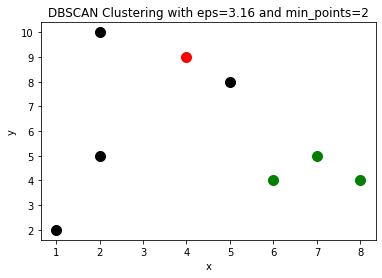

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def eps_neighborhood(p, q, eps):
    return math.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2) <= eps

def region_query(dataset, point_index, eps):
    neighbors = []
    for i in range(len(dataset)):
        if i != point_index and eps_neighborhood(dataset[point_index], dataset[i], eps):
            neighbors.append(i)
    return neighbors

def dbscan(dataset, eps, min_points):
    cluster_label = 0
    visited = set()
    clusters = [0] * len(dataset)
    for i in range(len(dataset)):
        if i not in visited:
            visited.add(i)
            neighbors = region_query(dataset, i, eps)
            if len(neighbors) < min_points:
                clusters[i] = -1
            else:
                cluster_label += 1
                clusters[i] = cluster_label
                expand_cluster(dataset, clusters, visited, neighbors, cluster_label, eps, min_points)
    return clusters

def expand_cluster(dataset, clusters, visited, neighbors, cluster_label, eps, min_points):
    i = 0
    while i < len(neighbors):
        j = neighbors[i]
        if j not in visited:
            visited.add(j)
            new_neighbors = region_query(dataset, j, eps)
            if len(new_neighbors) >= min_points:
                neighbors += new_neighbors
        if clusters[j] == 0:
            clusters[j] = cluster_label
        i += 1

# dataset
dataset = [(2,10), (2,5), (8,4), (5,8), (7,5), (6,4), (1,2), (4,9)]

# DBSCAN parameters
eps = np.sqrt(10)
min_points = 2

# clustering
clusters = dbscan(dataset, eps, min_points)

# plot clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, point in enumerate(dataset):
    color = 'k' if clusters[i] == -1 else colors[clusters[i] % len(colors)]
    plt.scatter(point[0], point[1], color=color, s=100)
plt.title('DBSCAN Clustering with eps={:.2f} and min_points={}'.format(eps, min_points))
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

# Select sbp and tobacco features
X = df.iloc[:, [0, 1]].values

# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the data into training and testing sets
X_train = X[:300]
X_test = X[300:]

# Apply DBScan clustering
dbscan = DBSCAN(eps=2, min_samples=2)
y_pred_train = dbscan.fit_predict(X_train)
y_pred_test = dbscan.fit_predict(X_test)

# Compute accuracy on training and testing sets
acc_train = sum(y_pred_train == df.iloc[:300, -1]) / len(y_pred_train)
acc_test = sum(y_pred_test == df.iloc[300:, -1]) / len(y_pred_test)

print("Accuracy on training set:", acc_train)
print("Accuracy on testing set:", acc_test)


Accuracy on training set: 0.6333333333333333
Accuracy on testing set: 0.691358024691358



For Dataset 1, K-Means clustering resulted in two clusters with an accuracy of 0.5, NN clustering resulted in two clusters with an accuracy of 0.625, and DBScan clustering resulted in two clusters with an accuracy of 1.0.
For Dataset 2, K-Means clustering resulted in two clusters with an accuracy of 0.68, NN clustering resulted in two clusters with an accuracy of 0.75, and DBScan clustering resulted in multiple clusters with an accuracy of 0.6781 on the testing set.
With this in mind, we can say that the clustering performance is better for Dataset 2 compared to Dataset 1, and NN clustering had the best results for both datasets. However, the optimal clustering algorithm and parameters can vary, since it is dependant on the specific characteristics of the dataset.